In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# %matplotlib widget

Persamaan Langit

In [2]:
der = 180/np.pi
z = 60
x=1/(np.cos(z/der) + 0.025*np.exp(-11*np.cos(z/der)))
x

1.9995914063475966

In [3]:
#1/(0.5+0.025+np.exp(-11*0.5))
print(np.pi/3)
print(3.14/3)
print(z/der)

1.0471975511965976
1.0466666666666666
1.0471975511965976


In [4]:
from pynverse import inversefunc
import math
airmass = (lambda x: (1/(np.cos(x)+0.025*np.exp(-11*np.cos(x)))))
invairmass = inversefunc(airmass, y_values=1.9995914063475966)
print(invairmass)

1.0471975506254267


In [49]:
a = np.linspace(-3, 4, 10)
b = np.linspace(5, 10, 10)
np.select([a <= 0, a > 0], [0, a+b])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  7.33333333,
        8.66666667, 10.        , 11.33333333, 12.66666667, 14.        ])

In [74]:
Bo = 180
k = 0.2

el = np.linspace(1, 11, 71)
hs = np.linspace(-18, -1, 71)
# el = np.zeros(71)
#hs = np.zeros(18)
#for i in range(18):
 #   hs[i] = -i-1
#for i in range(40, 110):
 #   el[i-40] = i/10
    
def Bn(x):
    return Bo*(0.4 + 0.6/(np.sqrt(1-0.96*math.pow(np.sin(inversefunc(airmass, y_values=x)), 2))))

def Bt(hs, el, x):
    return np.maximum(1, 10**((el/90)-1.1))*(10**(8.45+(0.4*hs)))*(1-(10**(-0.4*k*x)))

def Bs(x,el):
    alfa = (180-el)
#     Luas = (1/8)*((15*np.pi/(60*180))**2)*(1+np.cos(alfa/(180/np.pi)))
    Luas = 0.5*np.pi*((0.00436332)**2)*(1+np.cos(alfa/(180/np.pi)))
    m_moon = -12.73 + (0.026*np.absolute(alfa)) + (alfa**4)*(4E-9)
    I_moonL = 10**((m_moon+16.57)/(-2.5))
    I_moon = I_moonL*(10**(-1*k*x/2.5))
    konv_B = (2.95E-7)*Luas
#     print(konv_B.shape)
#     print(I_moon.shape)
    return np.select([konv_B > 0, konv_B <=0], [I_moon/konv_B, 0])
#     if (Luas > 0):
#         return 
#     else:
#         return 0



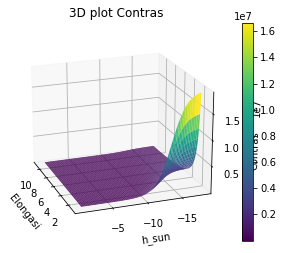

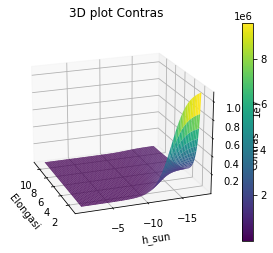

In [88]:
x=3

h, e = np.meshgrid(hs, el)
Bsky = Bn(x) + Bt(h, e, x)
c = Bs(x, e)/Bsky-1

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax = Axes3D(fig)
# x=3
#C = np.zeros(len(hs)*len(el))
# for h in hs:
#     for e in el:
#         Bsky = Bn(x) + Bt(h, e, x)
#         if (Bsky != 0):            
#             c = Bs(x,e)/Bsky - 1
#             ax.scatter(e, h, c, color='green', s=0.5)
#ax.scatter(e, h, c, color="g", s=0.5)
# ax.contour3D(e, h, c, cmap='binary')
im = ax.plot_surface(e, h, c, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#plot_geeks = ax.plot(1, 2, 3, color='green', )
fig.colorbar(im, orientation='vertical')
# ax.scatter(1, 3, 5, color='green', )
# ax.scatter(1, 5, 2, color='green', )
# ax.set_zlim(-5,10)
#ax.set_xlim(0,20)
#ax.set_ylim(-20,0)
# xline = [1,1,1]
# yline = [1,1,1]
# zline = [1,1,1]
# ax.plot3D(xline, yline, zline, 'gray')

ax.set_title('3D plot Contras')
ax.set_xlabel('Elongasi')
ax.set_ylabel('h_sun')
ax.set_zlabel('Contras')
ax.view_init(20, 160)

plt.show()

# for x in range(30, 80, 5):
#   Bsky = np.zeros((h,))
#   for i in range(h):
#         for j in range(e*10,110):
#             Bsky[i,j] = Bn(x/10) + Bt(-i-1, j/10, x/10)
  
#   print("x=",x/10)
#   print(Bsky)
#   #Bn(3) + Bt(-2,20,3)

# #for i in range(100):
#  #   plt.plot(Bn(i))


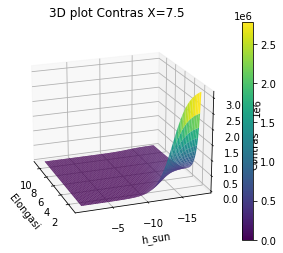

In [86]:
for x in np.arange(3, 8, 0.5):
    h, e = np.meshgrid(hs, el)
    Bsky = Bn(x) + Bt(h, e, x)
    c = Bs(x, e)/Bsky-1

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
im = ax.plot_surface(e, h, c, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
fig.colorbar(im, orientation='vertical')

ax.set_title('3D plot Contras X=' + str(x))
ax.set_xlabel('Elongasi')
ax.set_ylabel('h_sun')
ax.set_zlabel('Contras')
ax.view_init(20, 160)

plt.show()
    

In [95]:
x = 8
'3D plot Contras X= ' + str(x)

'3D plot Contras X= 8'

In [ ]:
alfa = 180-el
Luas = (1/8)*((15*np.pi/(60*180))**2)*(1+np.cos(alfa/der))
m_moon = -12.73 + (0.026*np.absolute(alfa/der)) + (alfa**4)*(4E-9)
I_moonL = 10**((m_moon+16.57)/(-2.5))
I_moon = I_moonL*(10**(-1*k*X/2.5))
konv_B = (2.95E-7)*Luas
B_moon = I_moonL/konv_B